# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['maningrida', 'new norfolk', 'okhotsk', 'kapaa', 'marawi', 'utiroa', 'port lincoln', 'taolanaro', 'northam', 'akyab', 'bolungarvik', 'qiqihar', 'talas', 'rikitea', 'adrar', 'senno', 'kota belud', 'nikolskoye', 'amderma', 'bengkulu', 'albany', 'vaini', 'yellowknife', 'saint-philippe', 'hermanus', 'avera', 'alofi', 'mahebourg', 'ushuaia', 'sroda wielkopolska', 'busselton', 'upernavik', 'lakes entrance', 'puerto ayora', 'komsomolskiy', 'georgetown', 'bredasdorp', 'nizhneyansk', 'longyearbyen', 'nantucket', 'khatanga', 'kaitangata', 'gigmoto', 'bambous virieux', 'chuy', 'irece', 'jardim', 'colares', 'coquimbo', 'east london', 'mar del plata', 'zeya', 'vostok', 'san andres', 'salym', 'kodiak', 'sunggal', 'carnarvon', 'opunake', 'fairbanks', 'doka', 'chapais', 'gambo', 'port elizabeth', 'luderitz', 'atuona', 'guerrero negro', 'karratha', 'namatanai', 'hulan ergi', 'dikson', 'ulaangom', 'jacareacanga', 'saldanha', 'havoysund', 'kinablangan', 'arraial do cabo', 'port hedland', 'worland', 'lag

In [4]:
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#make empty lists 
city_list = []
lat_list = []
lng_list = []
max_temp = []
humidity_list = []
cloudiness_list = []
wind_speed = []
country_list = []
date_list =[]

#create list and convert to json
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])

    except(KeyError): 
           print("city not found")   

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found


In [ ]:
pprint(response)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#create dictionary to put into a dataframe
weather_data = pd.DataFrame({
        "City": city_list,
        "Country": country_list,
        "Date" : date_list,
        "Lat" :  lat_list,
        "Lng" : lng_list,
        "Maximum Temperature": max_temp,
        "Humidity": humidity_list,
         "Cloudiness":cloudiness_list,
        "Wind Speed": wind_speed
})
weather_data

In [12]:
len(weather_data)

583

In [ ]:
print(weather_data.count())


In [59]:
weather_data.to_csv("weather_data.csv")

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
# high_humidity = weather_data.loc[:,["Humidity"] > 100]
# print(high_humidity)
high_humidity = weather_data[weather_data["Humidity"] > 100] 
print(high_humidity)

Empty DataFrame
Columns: [City, Country, Date, Lat, Lng, Maximum Temperature, Humidity, Cloudiness, Wind Speed]
Index: []


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
plt.scatter(
        weather_data["Lat"],
        weather_data["Maximum Temperature"])
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

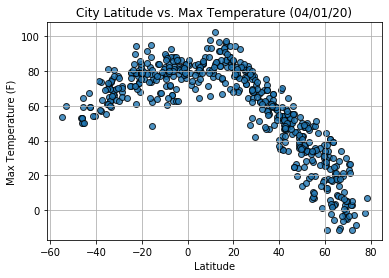

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

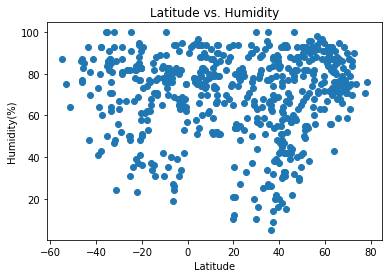

In [46]:
plt.scatter(
    weather_data["Lat"],
    weather_data["Humidity"]
)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

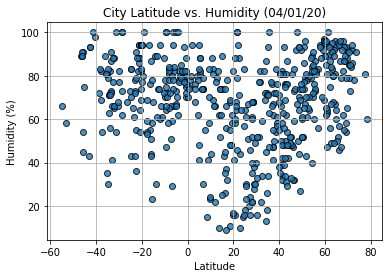

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

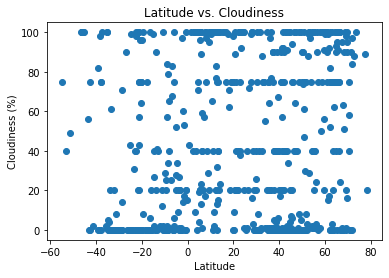

In [51]:
plt.scatter(
    weather_data["Lat"],
    weather_data["Cloudiness"]
)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

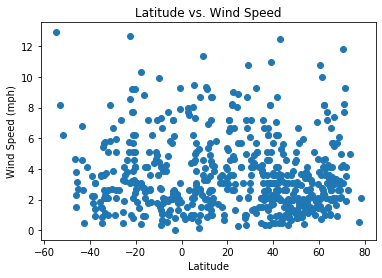

In [54]:
plt.scatter(
    weather_data["Lat"],
    weather_data["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

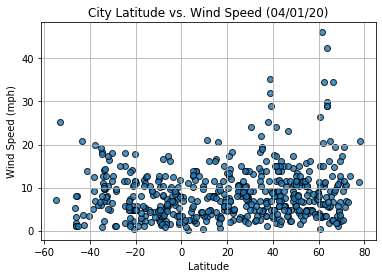

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#northern_hemisphere
nor_hem = weather_data.loc[weather_data["Lat"]>=0]


-0.7106822207017939


Text(0, 0.5, 'Max Temperature (F)')

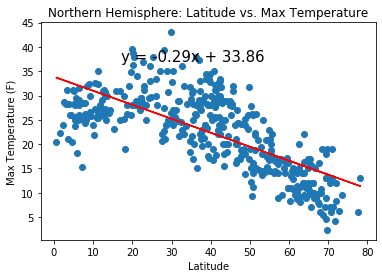

In [78]:

correlation = st.pearsonr(nor_hem["Lat"],nor_hem["Maximum Temperature"])[0]
print(correlation)

x_values = nor_hem["Lat"]
y_values = nor_hem["Maximum Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

The r-squared is: 0.8271188905041935


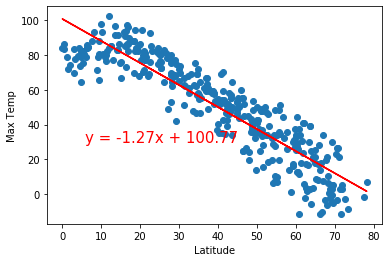

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
#southern_hemisphere
so_hem = weather_data.loc[weather_data["Lat"]<0]


0.7960113588900095


Text(17, 37, 'y = 0.45x + 27.75')

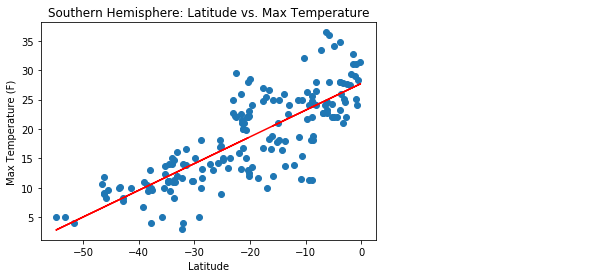

In [84]:
correlation = st.pearsonr(so_hem["Lat"],so_hem["Maximum Temperature"])[0]
print(correlation)

x_values = so_hem["Lat"]
y_values = so_hem["Maximum Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(17,37),fontsize=15,color= "black")

The r-squared is: 0.39936284758885965


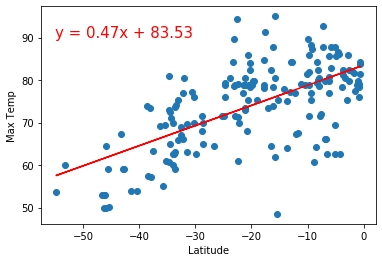

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.11410893475918725


Text(0, 0.5, 'Humidity (%)')

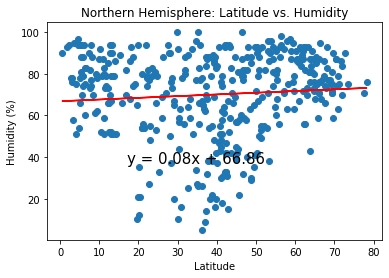

In [87]:

correlation = st.pearsonr(nor_hem["Lat"],nor_hem["Humidity"])[1]
print(correlation)

x_values = nor_hem["Lat"]
y_values = nor_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-squared is: 0.10829462153873139


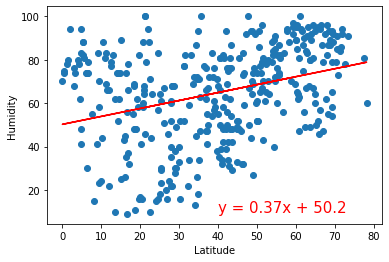

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.011876028485289437


Text(0, 0.5, 'Humidity (%)')

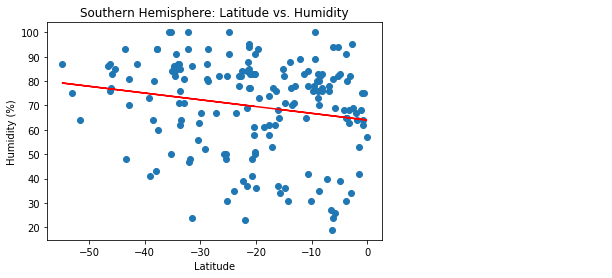

In [88]:
correlation = st.pearsonr(so_hem["Lat"],so_hem["Humidity"])[1]
print(correlation)

x_values = so_hem["Lat"]
y_values = so_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-squared is: 0.0008996079328825663


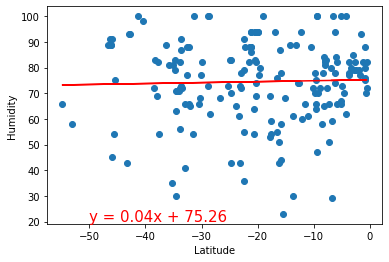

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.09021556837097766


Text(0, 0.5, 'Cloudiness (%)')

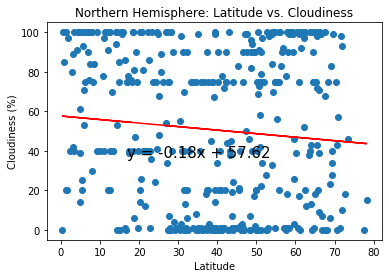

In [16]:
correlation = st.pearsonr(nor_hem["Lat"],nor_hem["Cloudiness"])[0]
print(correlation)

x_values = nor_hem["Lat"]
y_values = nor_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-squared is: 0.05768812657005063


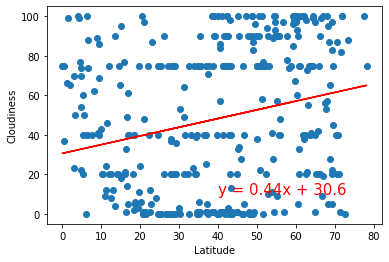

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.10425661746121398


Text(0, 0.5, 'Cloudiness (%)')

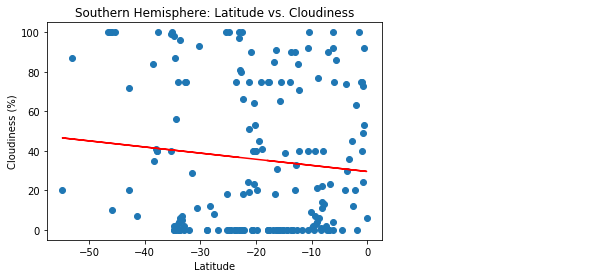

In [19]:
correlation = st.pearsonr(so_hem["Lat"],so_hem["Cloudiness"])[0]
print(correlation)

x_values = so_hem["Lat"]
y_values = so_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-squared is: 0.0684912094859049


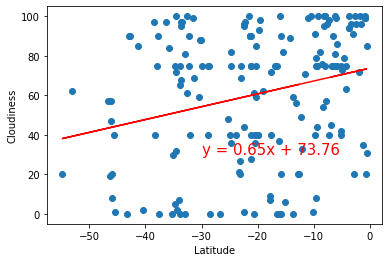

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.041464532843815294


Text(0, 0.5, 'Wind Speed (mph)')

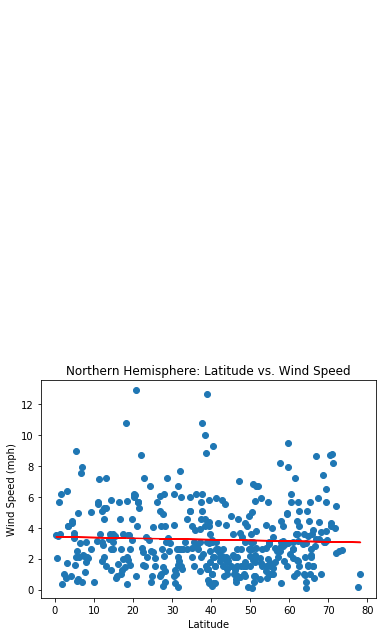

In [20]:
correlation = st.pearsonr(nor_hem["Lat"],nor_hem["Wind Speed"])[0]
print(correlation)

x_values = nor_hem["Lat"]
y_values = nor_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

The r-squared is: 0.023371104533850804


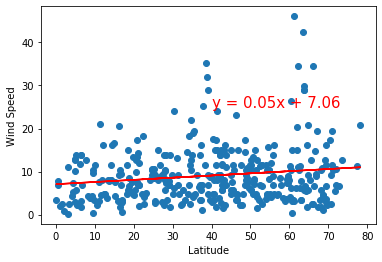

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.051648546077324275


Text(0, 0.5, 'Wind Speed (mph)')

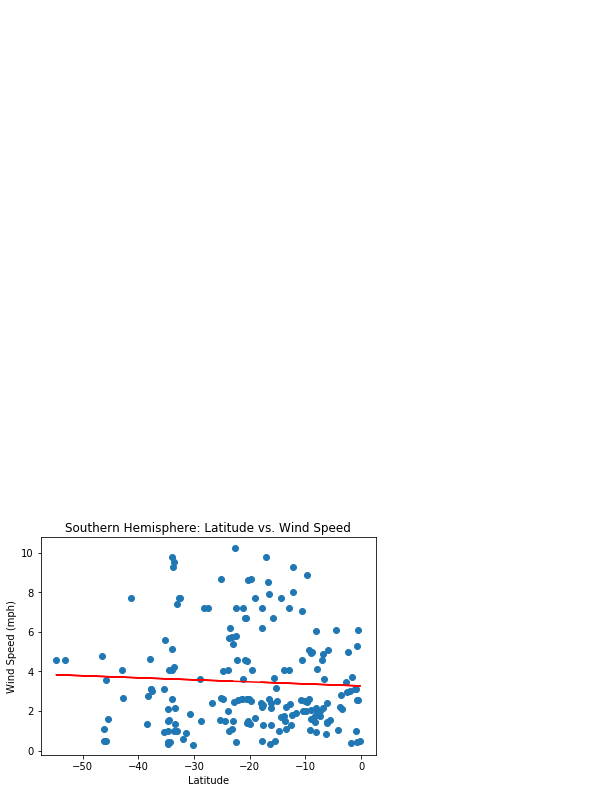

In [21]:
correlation = st.pearsonr(so_hem["Lat"],so_hem["Wind Speed"])[0]
print(correlation)

x_values = so_hem["Lat"]
y_values = so_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

The r-squared is: 0.03381889207758188


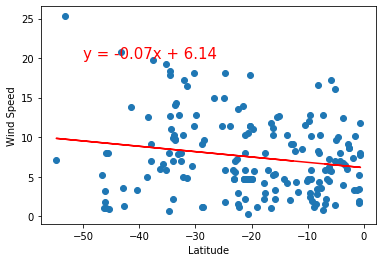